# Final Project Submission

Please fill out:
* Student name:  Brian Caterfino
* Student pace:  Full time
* Scheduled project review: Wednesday,October 31st 12 pm
* Instructor name: Rafael Carrasco/ Peter Bell


# King Country Housing Data Research 

#### With this exploration into the housing prices, and related variables, of houses in King county, Washington, I aim to draw meaningful conclusions about the data and to build a model that can help predict the sales prices for houses in the county. 

## OSEMN PROCESS

The OSEMN process is a standard procedure data science approach used to break down bigger projects into key parts, and help maintainan orgainzed work flow for your research. OSEMN is a acronym for Obtain data, Scrub data, Explore data, Model data, and finally iNterpret data. I will utilize the OSEMN process to help dechiper and interpret the information in Kaggle's King county housing data.

> For the obtaining step, since all the data is already compiled, I will simply need to import the data from Kaggle into this Jupyter Notebook and store it as a Pandas dataframe. Once the data is successfully imported, I will get descriptive statistics and learn about the meaning and contents of each variable column. This will help start the data scrubbing process. I will make sure all the variables are stored as the correct types of data ( integer, string, etc.). Then I will find all null values,and figure out what the best strategy for dealing with the null values will be. Once the data is scrubbed and properly stored, I start the exploration process. Here, I will make graphs of the variables to determine distributons of their data and properties. Then I will seach for correlation between all variables. The variables with high correaltion to price will be used to help build the model. But for the model, we cannot use variables that are highly correalted with eachother. We will also normalize data in order to get more normally distributed data sets. Now, the Modeling will begin. This stage will be a lot of guess and check work, plugging variables into the model and normalizing data to find the best combination of variables to predict price. Once I feel confident in mymodel, I will interpret its reulsts based on the statistics provided, and draw 3 meaningful conclusions from the data. This will conclude the OSEMN process. 

## Obtaining the Data

First I import pandas, read the csv, and store it as pd.
I also import mathplotlib for graphing and displaying data, along with a default grpah theme. 
I also create a lockedprice variable, for later use.

Then I show the first 5 rows of the data.

In [65]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
import matplotlib.pyplot as plt
plt.style.use('ggplot')
lockedprice=df['price']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now, I show the shape of the data, to show there are 21597 observations, and 21 columns of data.

In [66]:
print(df.shape)

(21597, 21)


The info function is used to show how many non null values there are, and which type each variable is stored as.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


So I cansee there are 3 columns with a lot of null values, and a few variables stored as the wrong type of data.
I will run isna to get a clearer look at the counts of null values of each column.

In [68]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Now I will run describe to show the descriptive statistcs for each of the variables, to get a better idea for the contents of each column.

In [69]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Scrubbing the Data 

After a little exploration, we want to start the cleaning process. From the info, we can see a few columns with some data missing.

**waterfront:**       19221/21597 non-null float64 = 2376 null

**view:**             21534/21597 non-null float64 = 63 null

**yr_renovated:**     17755/21597 non-null float64= 3842 null

There are only 63 missing values in view, but thousands of missing values in both other columns. These must be dealt with
before we  conitnue the analysis. Let's investigate these missing values. Ill start with sqft_basement, which has a question mark as a value, and is stored as a string. I will replace the ? with a 0 and convert the column to a float, because it just should be a number not a string.



In [70]:
df['sqft_basement'].replace('?', '0.0', inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [71]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The waterfront column is supposed to be categorical, whether the house is on the waterfront or not. 
Currently it is stored as a float, but first we need to deal with the NaN values.
Since there are only 63/21597 NaN vals, we need to assimilate the NaN vals into the dataset
It is safe to assume that the majority of the NaN values are not waterfront houses,
There is a big incentive to list if your house is waterfront, so if there is no data, it is doubtful the house is waterfront.
So we convert the NaN to 0, then we create dummy variables for the categorical data.

In [72]:
df.waterfront.fillna(value = 0, inplace = True)
df = pd.concat([df, pd.get_dummies(df['waterfront'], prefix=['WF'])], axis=1);
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,['WF']_0.0,['WF']_1.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0


**Now we will explore the year renovated category.** 

In [73]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

70 values, with the vast majority being 0, never renovated. So the problem comes from the difference between Nan and 0.0

If there is a 0 in the column, we can assume it hasnt been renovated. 
There are 3842 NaN values(17.7%; a substantial amount), meaning no renovation data provided.
As to not lose all the data by deleting the column, I think the best bet is to assume NaN values have not been renovated.
So we need to integrate the NaN values into 0.
But, as the value is stored as float, the value 0 would be counted as last rennovted in the year 0, which would throw off our summary stats. I think the best option here is to replace all 0 values with the year they were built. So if a house hasnt been rennovated, its rennovated value will just be the year it was built. I loop through all values and if the value is 0.0 I replace it with the year built value.

In [74]:
df.yr_renovated.fillna(0.0, inplace=True)
df['yr_renovated'].astype(int)
df['yr_renovated'].head()
lockedyrrenovated=df.copy(deep=True)
lockedyrrenovated.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,['WF']_0.0,['WF']_1.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0


In [75]:
actualyr_renovated=[] #altered data
for yr_renovated, yr_built in zip(df.yr_renovated, df.yr_built):#loop through the two columns
    if yr_renovated==  0.0 or yr_renovated== 0:# if yrrenovated is 0
        actualyr_renovated.append(yr_built)#make actualyrrenvated equal to yr built
    else:
        actualyr_renovated.append(yr_renovated)#fill new data set with old yrrenovated because value isnt 0
df.yr_renovated= actualyr_renovated
df.yr_renovated.head()

0    1955.0
1    1991.0
2    1933.0
3    1965.0
4    1987.0
Name: yr_renovated, dtype: float64

In [76]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Now that we dealt with waterfront, we are going to look at the view column. 
This seems like a rating system of the view from the house, with a vast majority of reveiws at 0 and Nan
This is another example of needing to fill the NaN values 

In [77]:
df.view.fillna(0.0, inplace=True)
print(df.view.isna().sum())
df.view.value_counts()

0


0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Because I assume over 90% of ratings were not rated 0, I can assume 0.0 means no rating provided
Because of this assumption, and because NaN values provide no rating, we can count all NaN values as 0


Also, I will convert zipcodes, and ID# to strings because we are not interested in the numerical values of zip codes or ID# as much as we are using them as a classification string


In [78]:
df['zipcode']= df['zipcode'].astype(str)
df['id']= df['id'].astype(str)

### Exploring the Data

Now, I plot the histogram for 17 of the 21 values, excluding date, id, and zipcode, and waterfront. These values histograms would not be useful. I also plot the KDE on top of the histogram. This is to evaluate the distributions of each important column. 

In [79]:
df1= list(df)
df1.remove('date')
df1.remove('id')
df1.remove('zipcode')

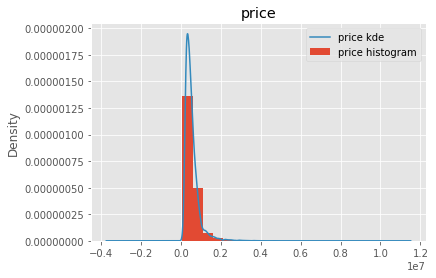

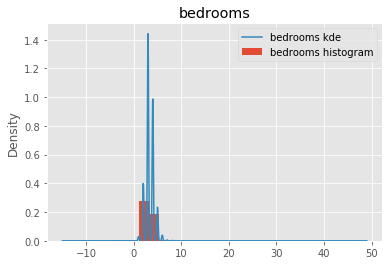

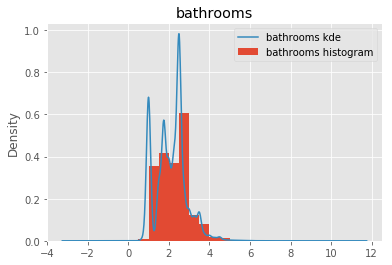

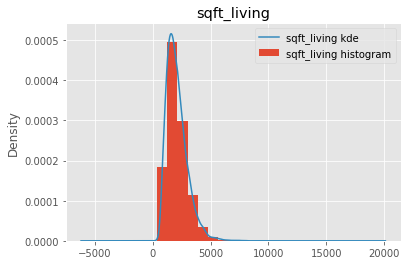

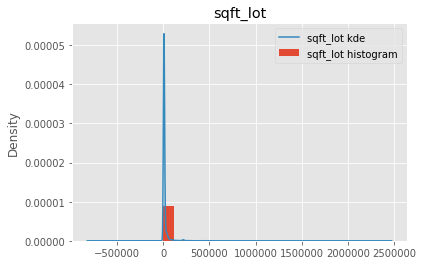

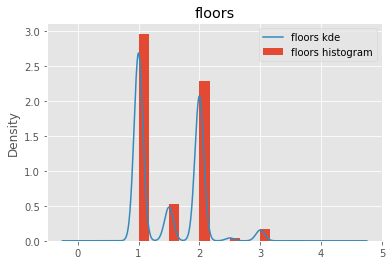

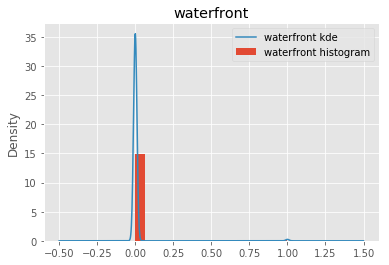

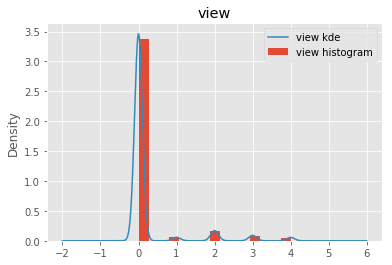

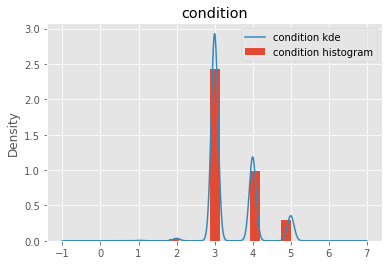

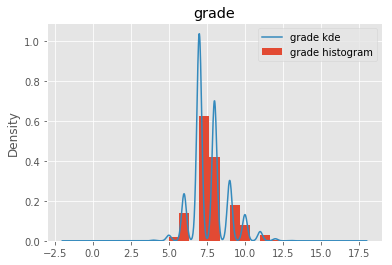

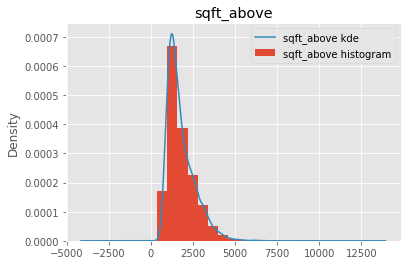

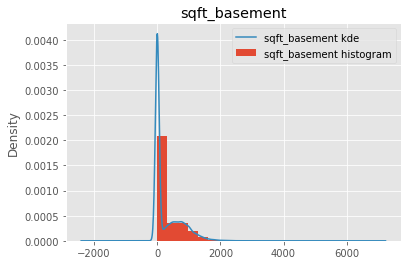

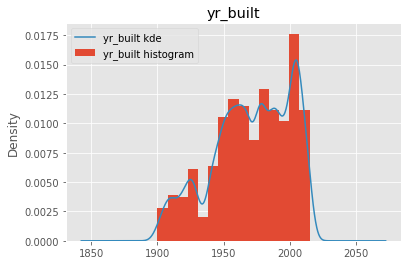

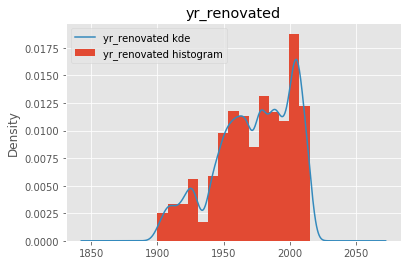

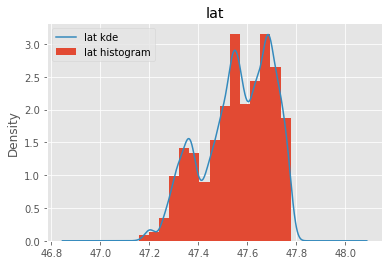

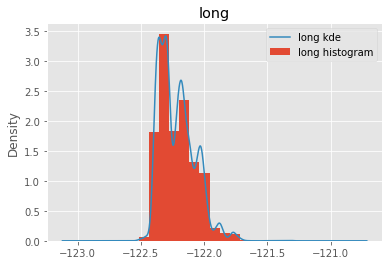

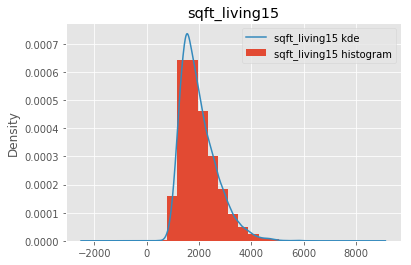

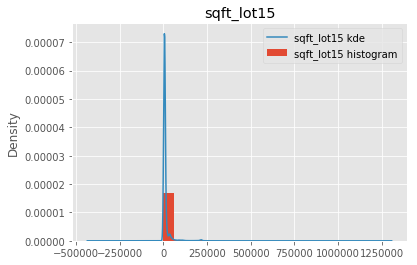

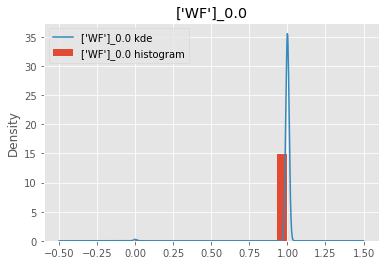

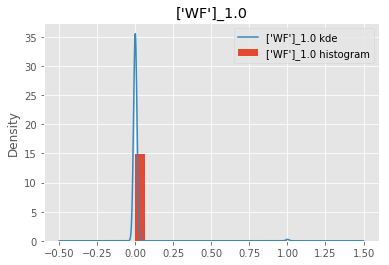

In [80]:
for column in df1:
    df[column].plot.hist(density=True, label = column+' histogram', bins = 15)# add histrogram
    df[column].plot.kde(label =column+' kde')#add KDE's
    plt.legend()
    plt.title(column)
    plt.show()

Now I want to look at the scatter plots of the variables, with a linear regression (OLS) plotted on top, along with Y and fitted v X, Residual v. X, Partial regression plot, CCPR plot, and QQ plot. This is to get a good idea of the regression fit, along with the error terms of variance and heterskedacsticity. Also, in this process, I create a list of the variables I wish to calculate regression, and store them for the next step.

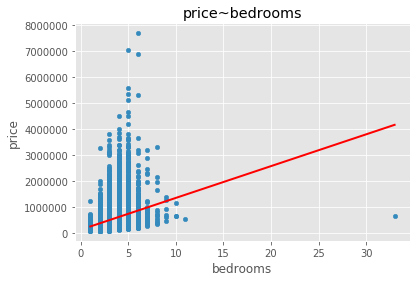

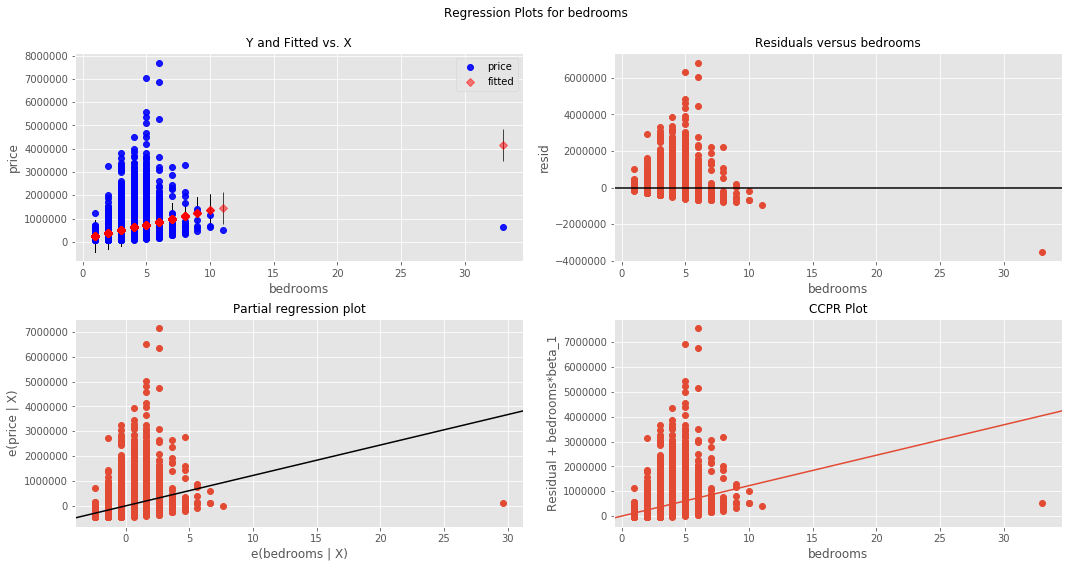

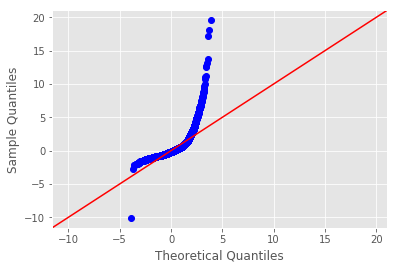

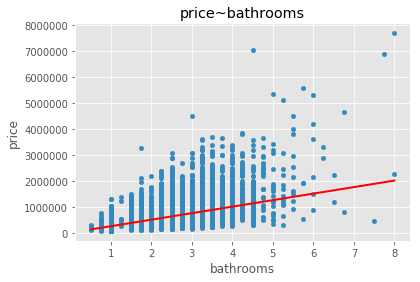

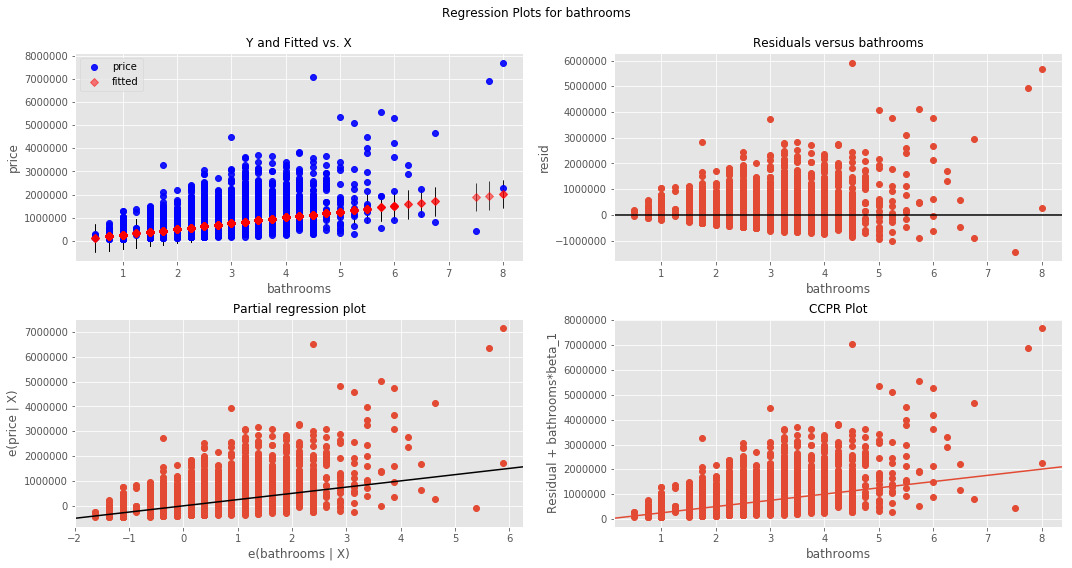

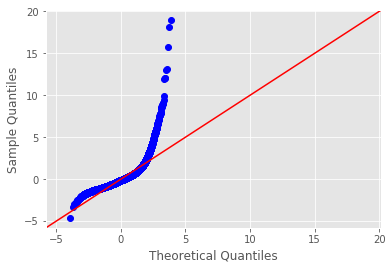

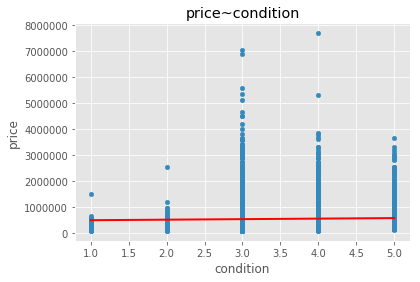

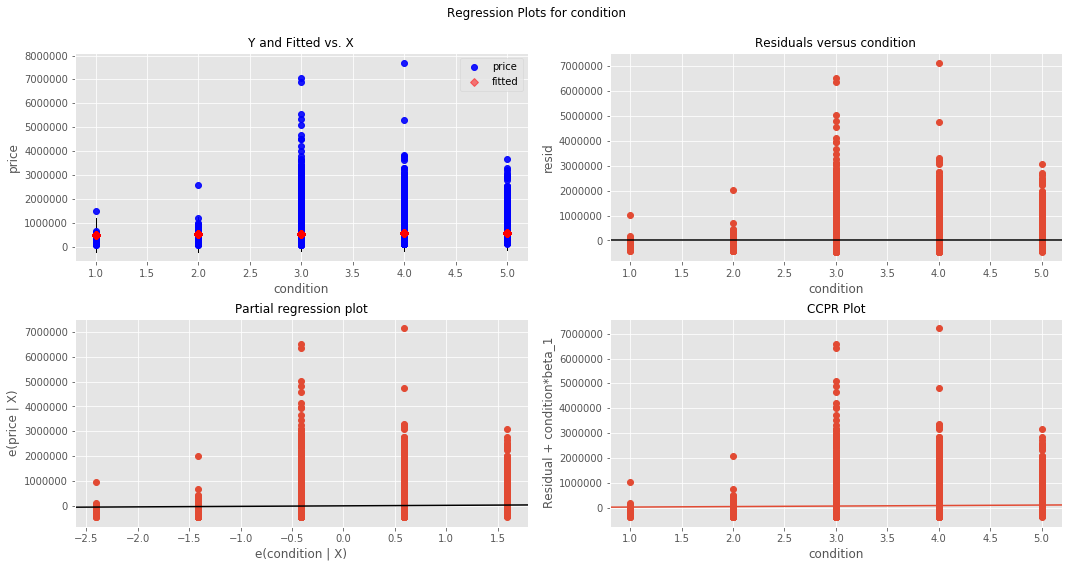

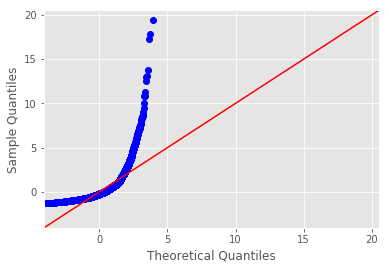

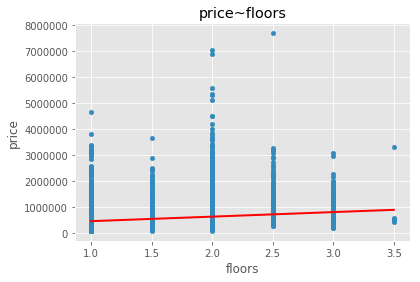

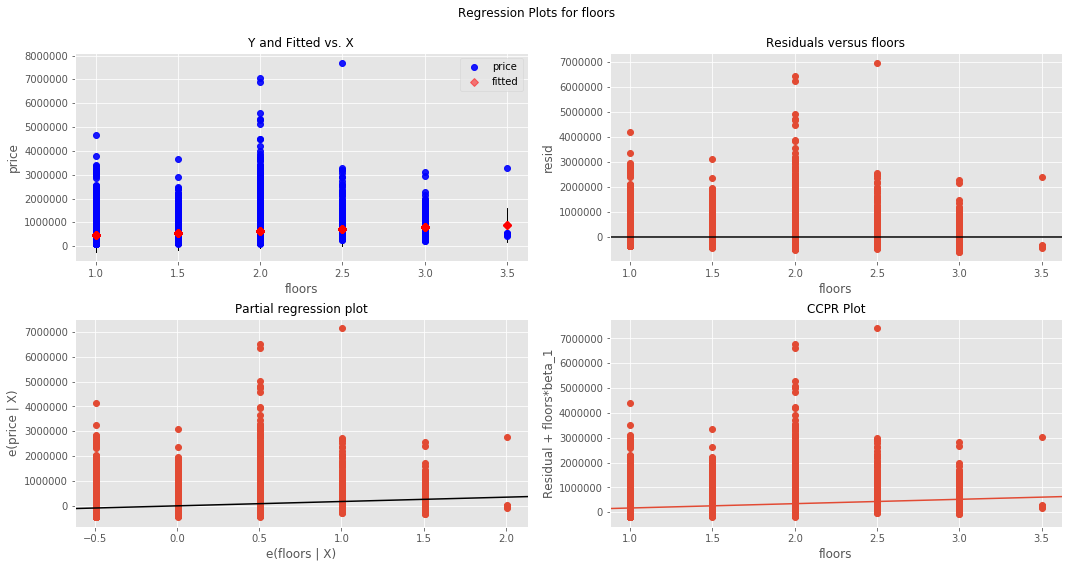

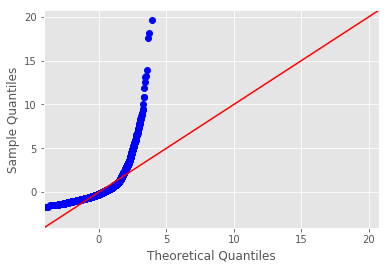

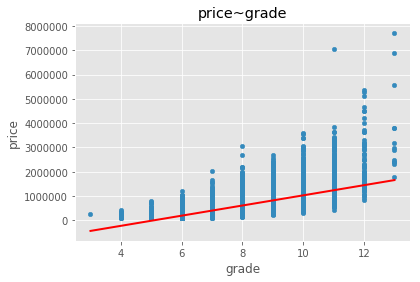

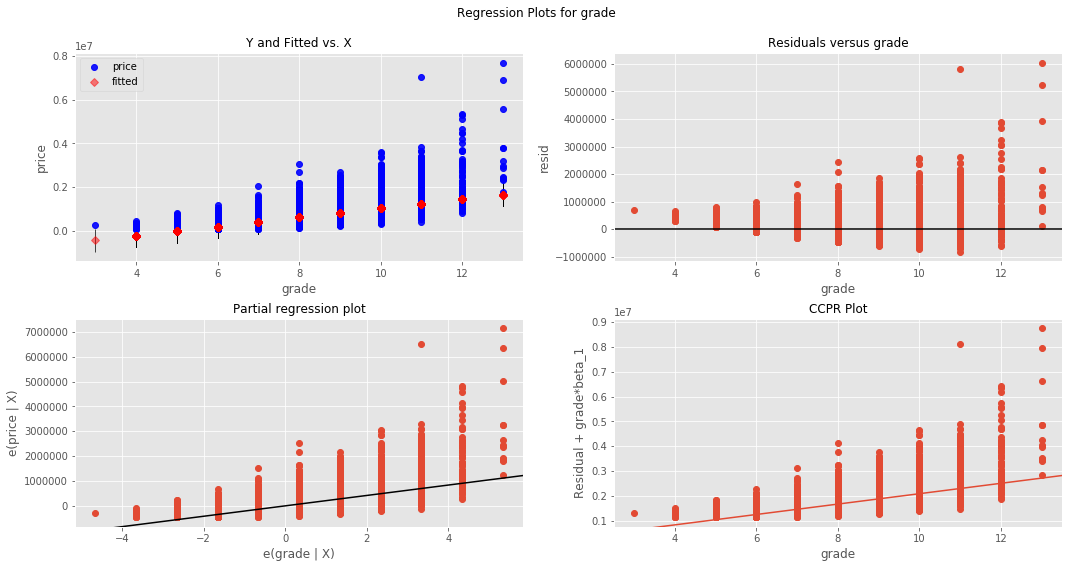

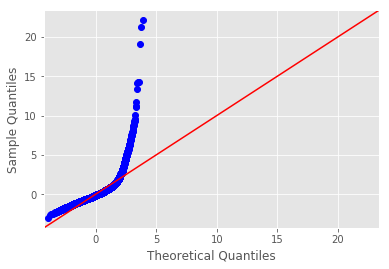

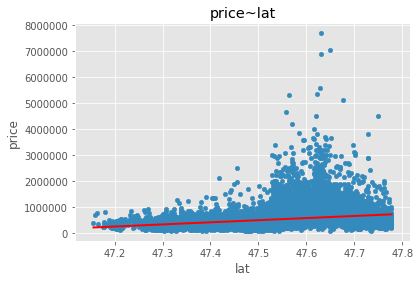

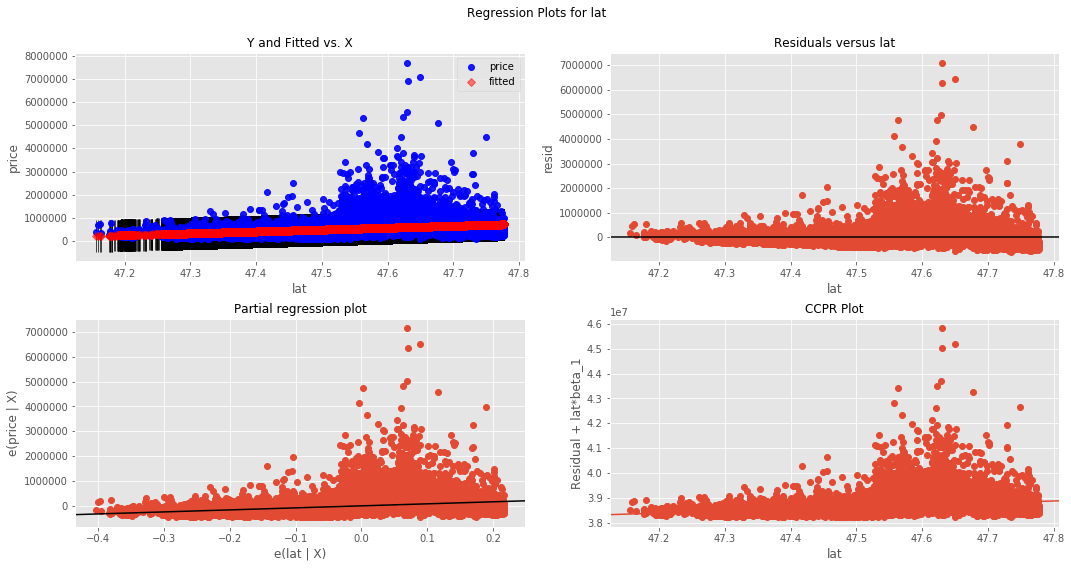

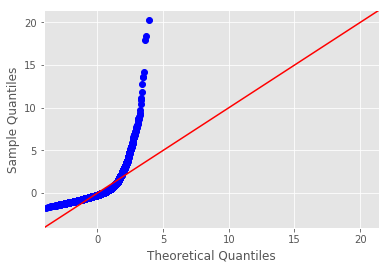

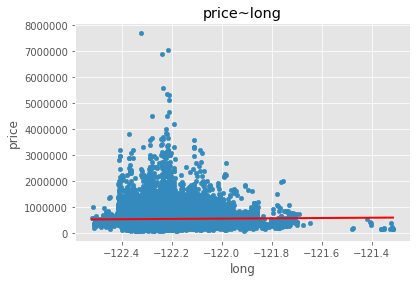

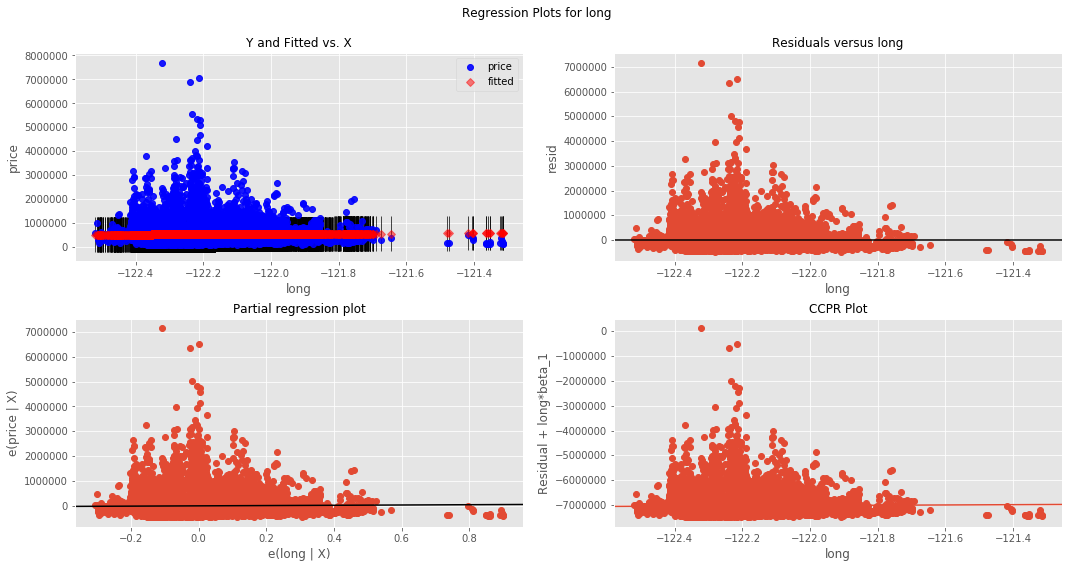

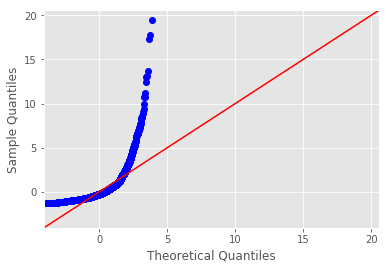

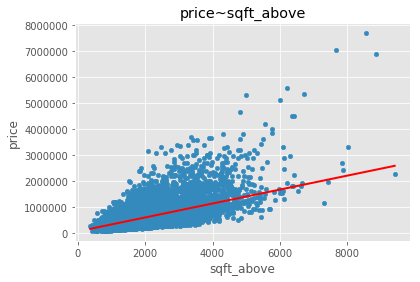

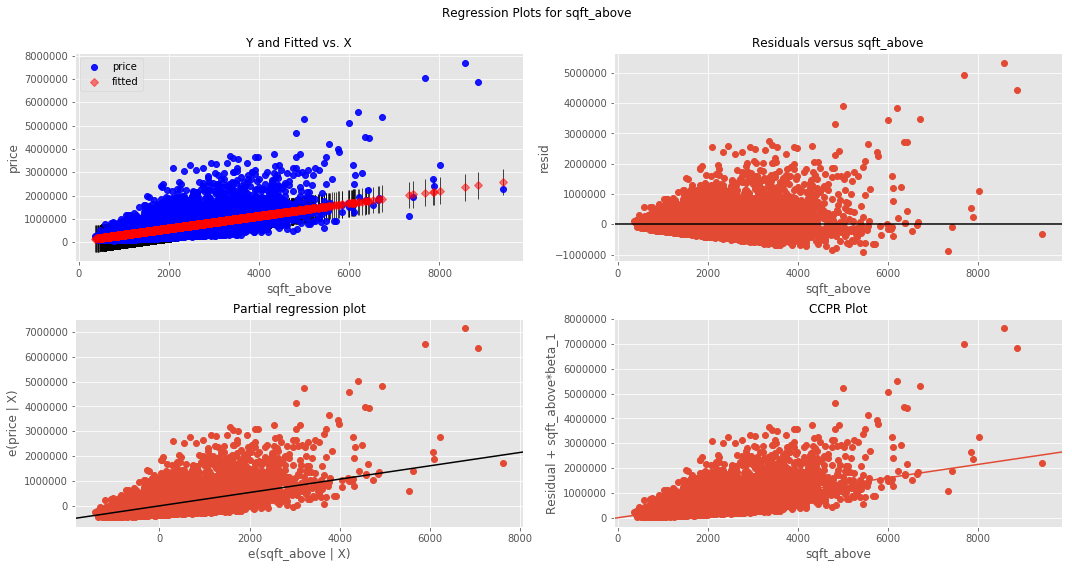

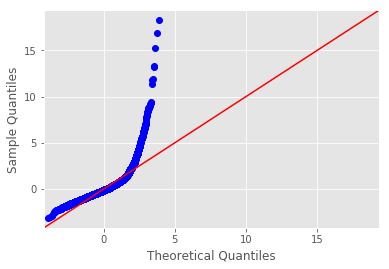

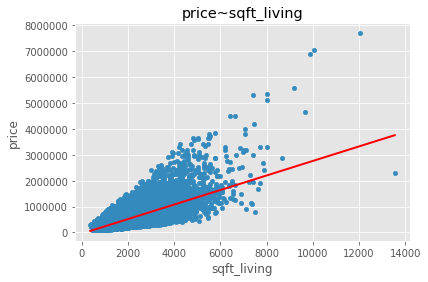

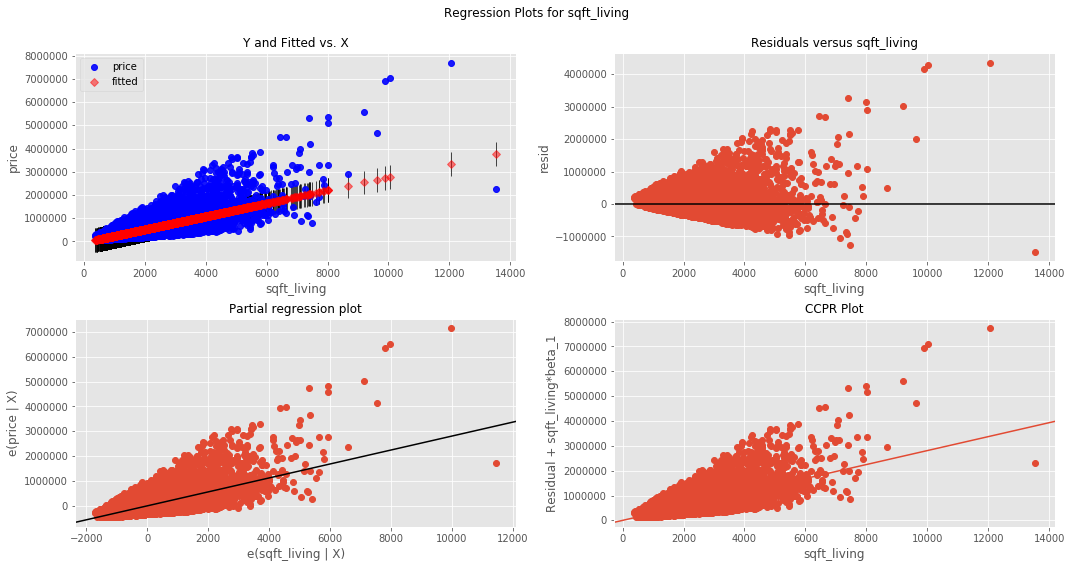

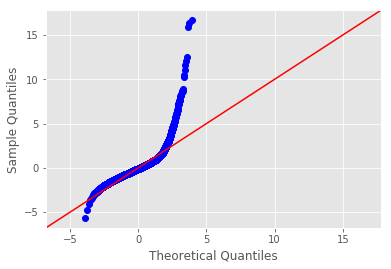

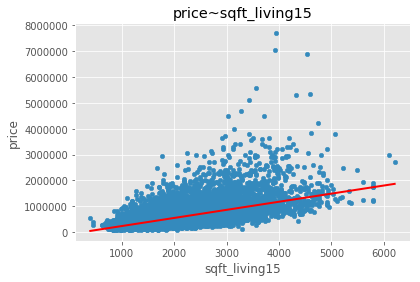

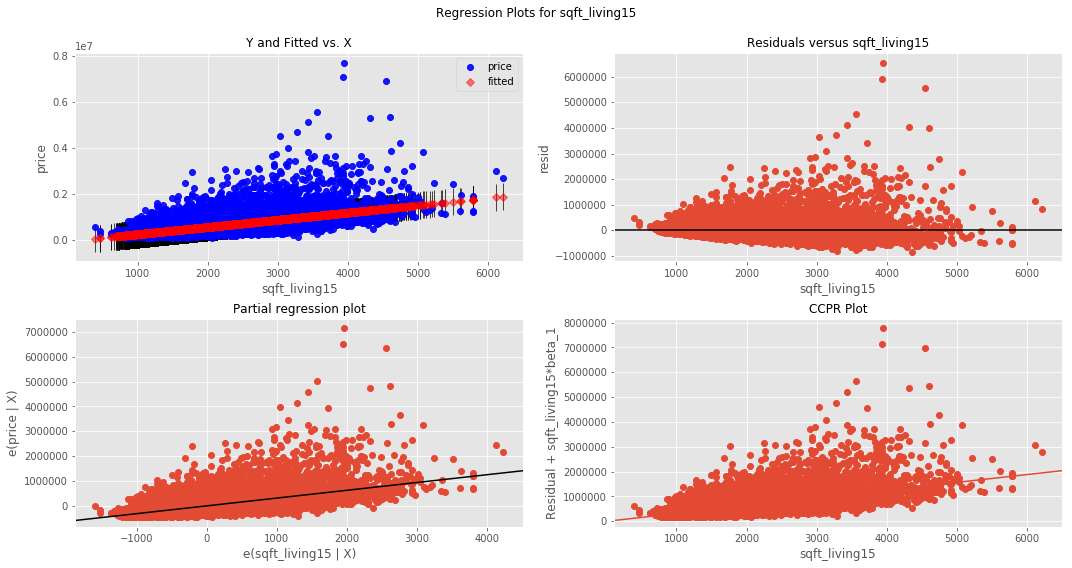

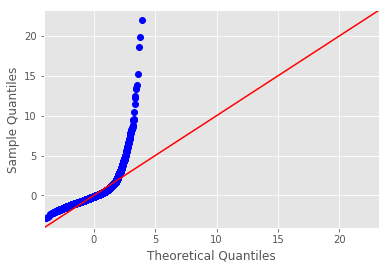

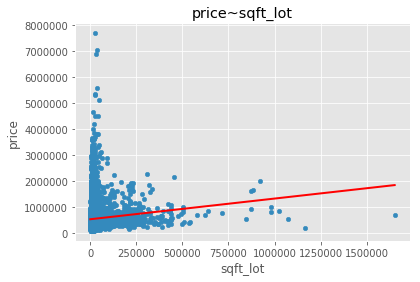

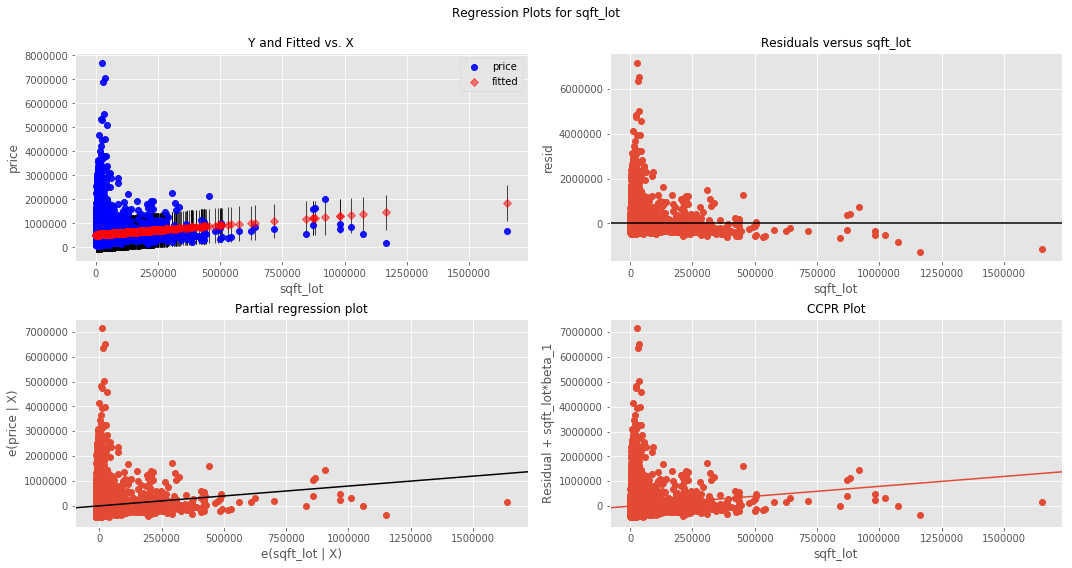

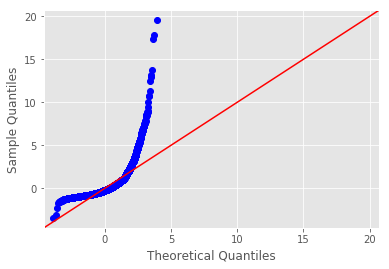

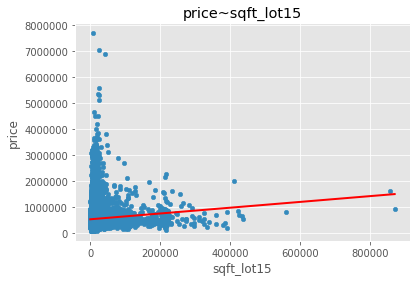

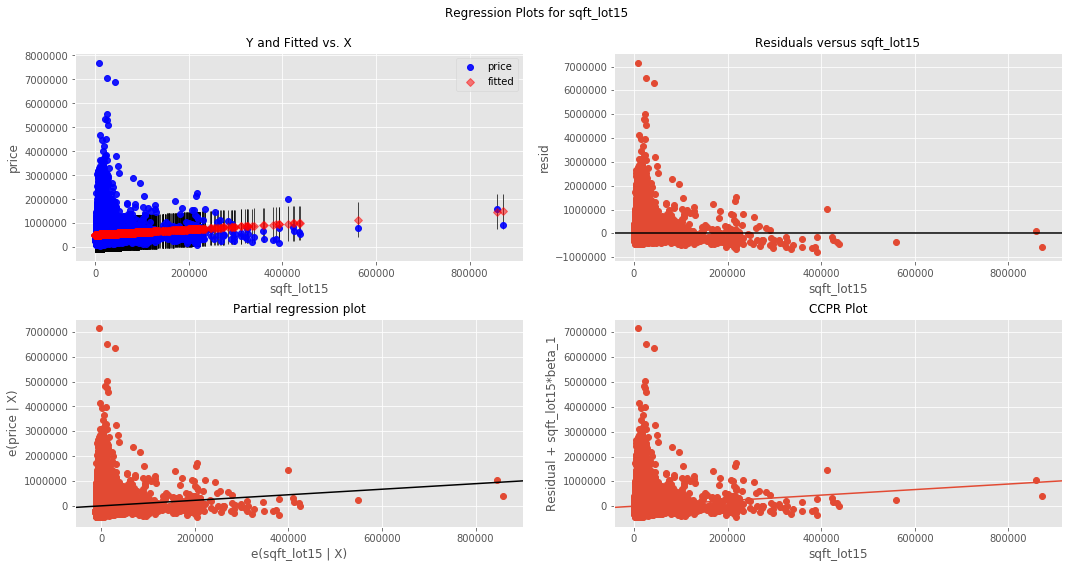

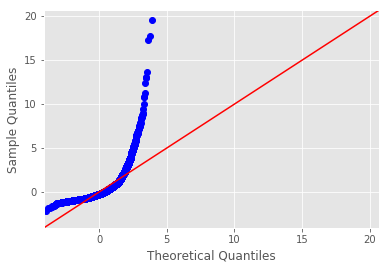

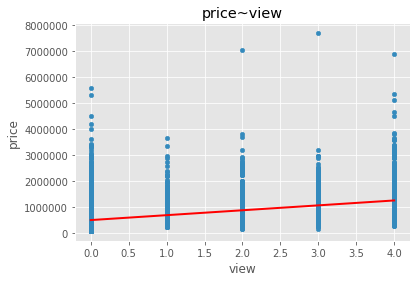

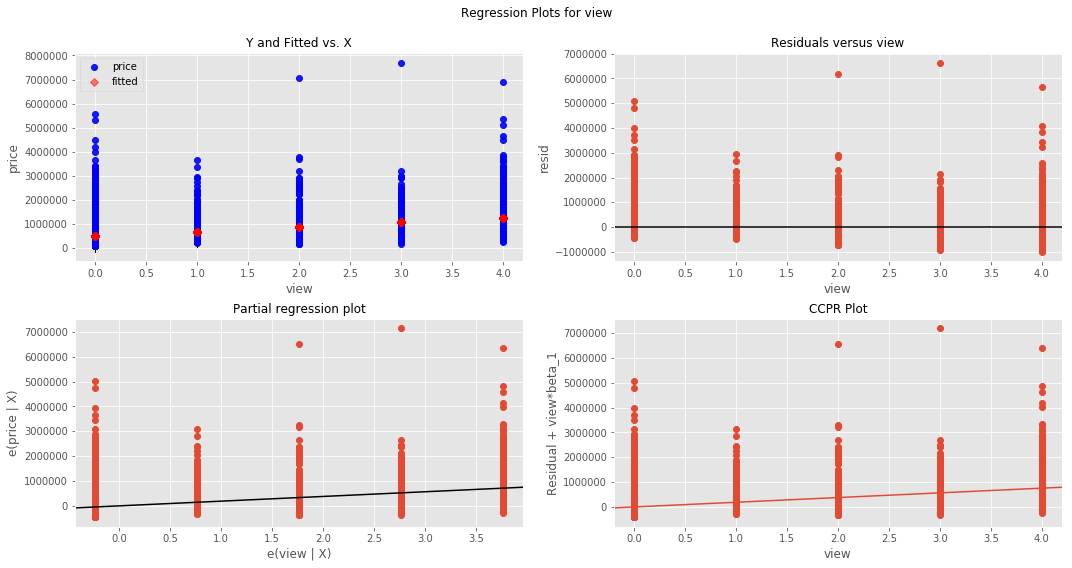

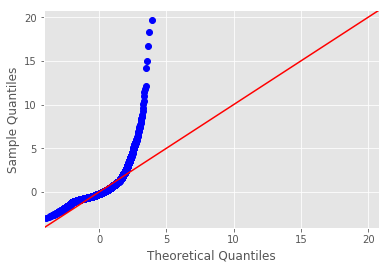

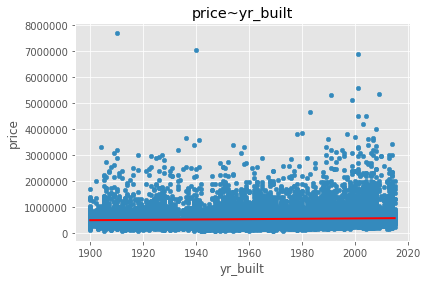

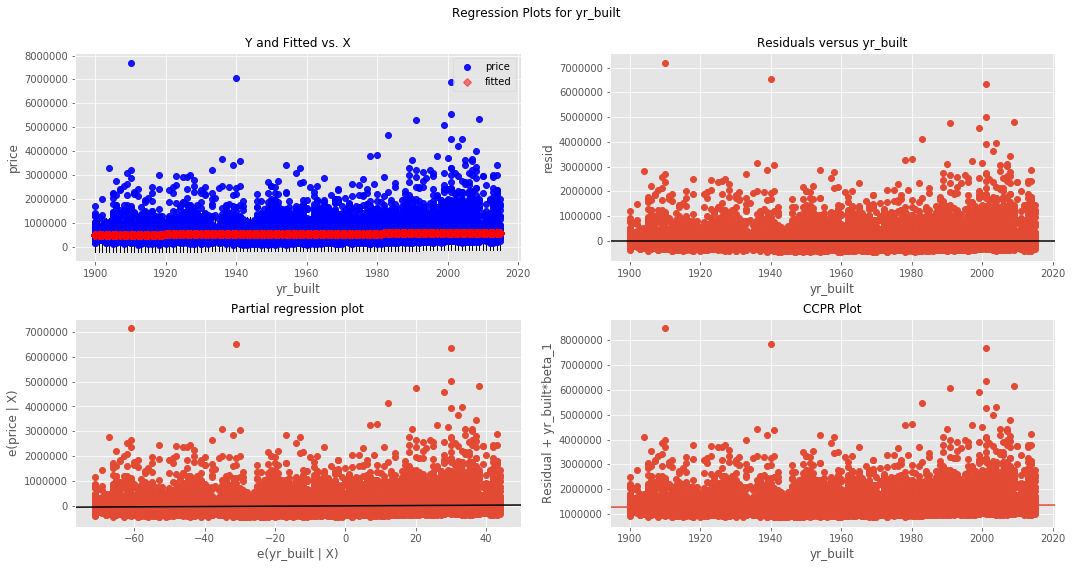

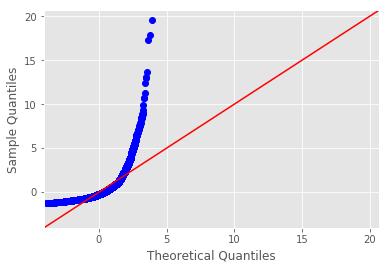

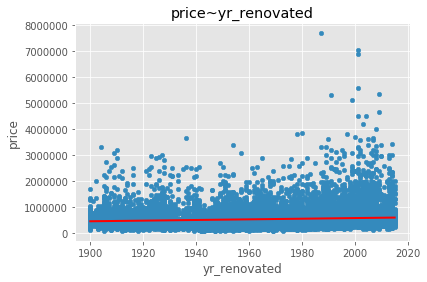

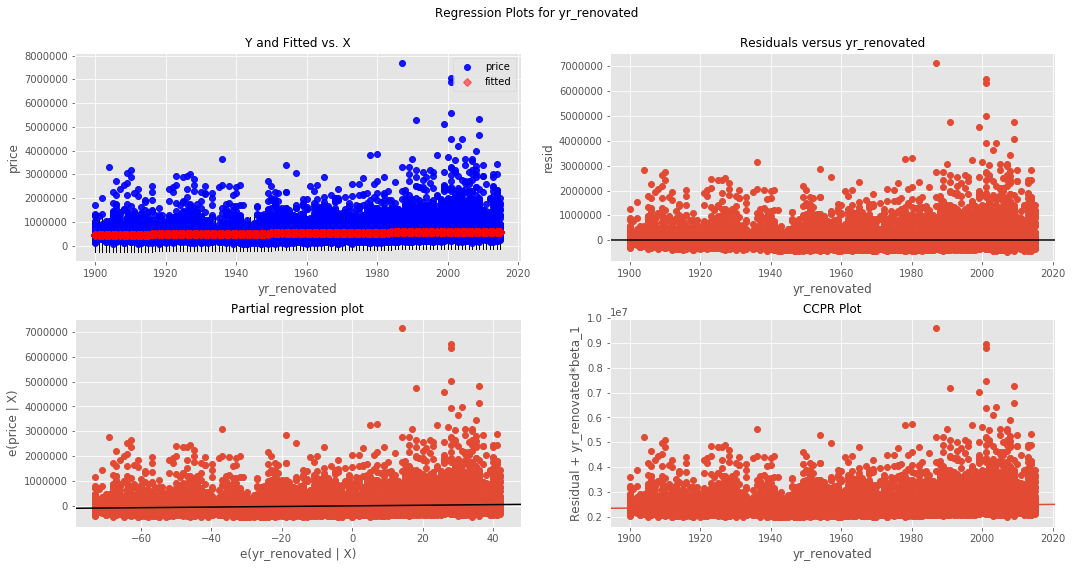

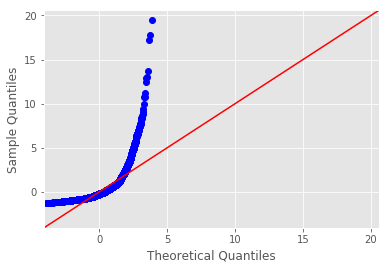

In [81]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms #import all the packages we will use for the graphs
flist=[]
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]#storing resuls
for idx, val in enumerate(['bedrooms', 'bathrooms', 'condition', 'floors', 'grade', 'lat','long', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view','yr_built' ,'yr_renovated']):
    #this loops through all the noncategroical columns.
    f = 'price~' + val
    flist.append(f) 
    #this will be used in the next step for getting the linear regression
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price'); #creating the scatter
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.title(f)
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,) #getting qq plots
    plt.show()
    results.append([val, model.rsquared, model.params[0], model.params[0], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])# appending the results to store them
    model = smf.ols(formula=f, data=df).fit()
    model.summary()


Okay, so these graphs are alot for a small conclusion, but it seems like most of the data sets are not normally distributed and have skews. This will behelpful in knowing when to normalize data. 

Here, I take the list I created from the previous step, and run linear regression to see each variables relation to price of the houses.

In [82]:
for f in flist:
    model = smf.ols(formula=f, data=df).fit()
    print(f , model.summary())
model = smf.ols(formula=f, data=df).fit()
print('waterfront' , model.summary())

price~bedrooms                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:16:25   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     

strong multicollinearity or other numerical problems.
price~sqft_lot                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           5.57e-40
Time:                        12:16:25   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In the following two tables, I check correaltion between different variables, and then search for correalations that may signify colinearity between variables by sorting out all absolute values below .8 ( a high threshold) the make a heat map for esier visualization

In [83]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,['WF']_0.0,['WF']_1.0
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.097541,0.306692,0.022036,0.585241,0.082845,-0.264306,0.264306
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.164392,-0.009951,0.132054,0.393406,0.030690,0.002127,-0.002127
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.532389,0.024280,0.224903,0.569884,0.088303,-0.063629,0.063629
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.339146,0.052155,0.241214,0.756402,0.184342,-0.104637,0.104637
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.051870,-0.085514,0.230227,0.144763,0.718204,-0.021459,0.021459
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.500721,0.049239,0.125943,0.280102,-0.010722,-0.020797,0.020797
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,-0.006891,-0.012157,-0.037628,0.083823,0.030658,-1.000000,1.000000
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,-0.026631,0.006321,-0.077702,0.278928,0.073083,-0.380543,0.380543
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.390264,-0.015102,-0.105877,-0.093072,-0.003126,-0.016648,0.016648
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,0.459334,0.113575,0.200341,0.713867,0.120981,-0.082818,0.082818


It seems like a few of the variables might have colinearity. sqft_living and sqft_above are above .8, sqft-living and number of bathrooms,sqft_living15,  grade, and sqft_above are all above .75, sqft_above and grade are above .75, year built and year renovated are heavily correlated because I filled a lot of the values of year renovated with the values of year built, 
Here, I generate a heat map with seaborn to vizualize which columns might be colinear

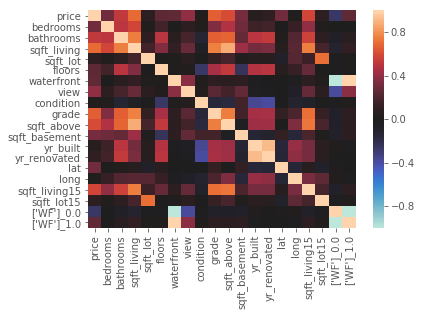

In [84]:
import seaborn as sns
sns.heatmap(df.corr(), center=0);

### Modeling the Data

#### Normalizing

So now that I know the ins and outs of this data set, and the data is cleaned up, it is time to start extracting conclusions.
My only conclusion I can reach so far is that almost none of the data is normally distributed, and all of it is of different units, so I may want to consider normalizing the data. Hoping for simplicity, I will only do this to a couple variables I want to work with. I may need these scaled data sets in the future

In [85]:
import numpy as np
logsqft_living = np.log10(df["sqft_living"])
# WAY more normal
normlogsqft_living = (logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))
# now values are standardized
logsqft_lot = np.log10(df["sqft_lot"])
normlogsqft_lot = (logsqft_lot-np.mean(logsqft_lot))/np.sqrt(np.var(logsqft_lot))
logbedrooms = np.log10(df["bedrooms"])
normlogbedrooms = (logbedrooms-np.mean(logbedrooms))/np.sqrt(np.var(logbedrooms))
logbathrooms = np.log10(df["bathrooms"])
normlogbathrooms = (logbathrooms-np.mean(logbathrooms))/np.sqrt(np.var(logbathrooms))
loggrade = np.log10(df["grade"])
normloggrade = (loggrade-np.mean(loggrade))/np.sqrt(np.var(loggrade))
loglat= np.log10(df["lat"])
normloglat = (loglat-np.mean(loglat))/np.sqrt(np.var(loglat))
logprice= np.log10(df["price"])
normlogprice = (logprice-np.mean(logprice))/np.sqrt(np.var(logprice))


We have to perform some standardization and remove outliers from the data to uncloud the relationships.
I will do this by removing data over 3 STDs away from the mean, and using some of the log normalization, and mean standardization. 

In [86]:
out11= df['price'].mean()-(3* df['price'].std())
out12= df['price'].mean()+(3* df['price'].std())
out21= df['bedrooms'].mean()-(3* df['bedrooms'].std())
out22= df['bedrooms'].mean()+(3* df['bedrooms'].std())
out31= df['condition'].mean()-(3* df['condition'].std())
out32= df['condition'].mean()+(3* df['condition'].std())
df['price']= normlogprice
df['sqft_living']= normlogsqft_living
df['price'].describe()

count    2.159700e+04
mean     2.960801e-13
std      1.000023e+00
min     -3.387659e+00
25%     -6.949183e-01
50%     -5.926981e-02
75%      6.244407e-01
max      5.333889e+00
Name: price, dtype: float64

#### Making the Model

Now to run another correlation on a new data set formed by our data standardization. We will use grade,  latitude, last year renovated, and bedrooms. These are all variables which showed high correlation, and not too high a colinearity 
with eachother. 

In [87]:
df2=df.loc[(df['price']>out11)& (df['price']<out12)& (df['bedrooms']>out21)& (df['bedrooms']<out22)& (df['condition']>out31)& (df['condition']<out32)]
df2.pop('date')
df2.pop('id')
df2.head()
m = smf.ols('price ~ grade + lat+ waterfront+ bedrooms ',df2).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                 1.058e+04
Date:                Mon, 05 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:16:42   Log-Likelihood:                -18755.
No. Observations:               21506   AIC:                         3.752e+04
Df Residuals:                   21501   BIC:                         3.756e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -136.3136      1.363    -99.978      0.0

### INterpret the Data

**Conclusion**

Great! Now we have a highly correlated model to predict price based on 4 variables from the data. This is what I should use as my multivariate regression model. From the coefficients, I can tell the impact of each variable from my model. The grade of the housing explains a .51 change in price when grad increases by one. The waterfront value accounts for a 1.5 move in the price. These are the most influential indicators. Then we have the lat variable with a 2.6 coefficient. This is because the values of the lat are so small, that changing lat by 1 is to change from extreme north to extreme south. SO, this may be the highest coefficient, but I do not belive it to have the highest impact on the model. 

Now, to split the data into training data and testing data, so we feed in a huge chunk of our data, calculate our residuals, then use the rest of our data as a test for our calculations on the training set. Then, we check the mean square error of the training set, divied by the the mean square error of the testing set, in order to calculate the ratio between the two. The closer our result is to 1, the better the training model works. 

C:\Users\Brian\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


1.0245979761168258


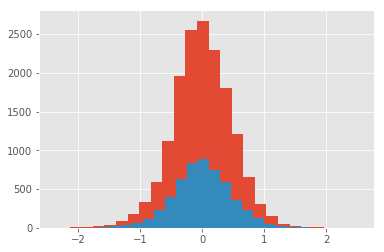

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y=df2.pop('price') # causes error on second run 
x= df2.values
xtr, xte, ytr, yte= train_test_split(x,y,train_size=0.75)
model= LinearRegression()
model.fit(xtr, ytr)
yhat_tr= model.predict(xtr)
yhat_te= model.predict(xte)
tr_res= yhat_tr - ytr 
te_res= yhat_te - yte
plt.hist(tr_res,bins= 25);
plt.hist(te_res,bins= 25);
mse_train = np.sum((ytr-yhat_tr)**2)/len(ytr)
mse_test =np.sum((yte-yhat_te)**2)/len(yte)
print(mse_train/mse_test)

This was used to check correlation of the log normalized price 

In [89]:
df3=df.loc[(df['price']>out11)& (df['price']<out12)]

My test/ train split tells me that my regression is a fairly good predictor of the prices. Now it is time to draw conclusions from my EDA and modeling. I will seek to answer three meaningful questions about this data set from my prior analyses. 

### QUESTION 1

#### Do houses on the north side  of King County sell for significantly higher values than those in the south?


First I will reset the price column to non normalized values, then I will split the dataframe above and below the mean latitude.


In [90]:
df['price']= lockedprice
dfnorth=df.loc[(df['lat']>df['lat'].mean())]
dfsouth=df.loc[(df['lat']<df['lat'].mean())]
df['lat'].mean()

47.56009299439733

In [91]:
dfnorth.describe()
dfsouth.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,['WF']_0.0,['WF']_1.0
count,1.001200e+04,10012.000000,10012.000000,10012.000000,1.001200e+04,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000
mean,3.995356e+05,3.362165,2.068618,-0.078391,1.809662e+04,1.447513,0.008190,0.216840,3.399720,7.451758,1762.466241,236.425290,1975.479225,1976.840392,47.436256,-122.194752,1931.279365,14621.689373,0.991810,0.008190
std,2.489764e+05,0.859806,0.740259,0.982925,5.059493e+04,0.495476,0.090133,0.736225,0.639673,1.139185,783.166346,410.540404,26.441112,25.958961,0.093174,0.148220,667.695228,30501.622781,0.090133,0.090133
min,7.800000e+04,1.000000,0.500000,-3.796843,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.588750e+05,3.000000,1.500000,-0.722552,5.969750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1958.000000,1959.000000,47.359475,-122.316000,1445.000000,6000.000000,1.000000,0.000000
50%,3.300000e+05,3.000000,2.250000,-0.052781,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1978.000000,1979.000000,47.456200,-122.202000,1810.000000,7920.000000,1.000000,0.000000
75%,4.535000e+05,4.000000,2.500000,0.587091,1.132500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,420.000000,1999.000000,1999.250000,47.521325,-122.115000,2300.000000,10377.750000,1.000000,0.000000
max,4.670000e+06,11.000000,6.750000,3.826091,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7850.000000,4820.000000,2015.000000,2015.000000,47.560000,-121.417000,6210.000000,560617.000000,1.000000,1.000000


In [92]:
print(dfnorth['price'].mean())

661945.1352611135


In [93]:
print(dfsouth['price'].mean())
print(dfnorth['price'].mean()/dfsouth['price'].mean())

399535.6278465841
1.656786251651357


Now we see that the mean of houses in the north are 66% higher than those in the south. 

In [94]:
dfnorth.corr()
dfsouth.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,['WF']_0.0,['WF']_1.0
price,1.000000,0.305914,0.543387,0.634282,0.180601,0.314422,0.273625,0.432913,-0.036477,0.698712,0.639072,0.287227,0.226372,0.255145,0.356824,0.158878,0.664254,0.160383,-0.273625,0.273625
bedrooms,0.305914,1.000000,0.533162,0.631507,0.011529,0.269254,-0.031834,0.064184,-0.023136,0.389568,0.491481,0.278607,0.271131,0.274150,-0.013977,0.116703,0.412041,-0.006616,0.031834,-0.031834
bathrooms,0.543387,0.533162,1.000000,0.777056,0.077210,0.573059,0.037987,0.165742,-0.193254,0.672769,0.700513,0.249565,0.616826,0.629589,0.021166,0.255323,0.622164,0.063124,-0.037987,0.037987
sqft_living,0.634282,0.631507,0.777056,1.000000,0.142377,0.482018,0.051603,0.227609,-0.121276,0.757928,0.839155,0.387330,0.483296,0.495205,0.017010,0.244860,0.751472,0.142246,-0.051603,0.051603
sqft_lot,0.180601,0.011529,0.077210,0.142377,1.000000,0.008493,0.024889,0.123896,0.022808,0.122731,0.160355,0.030907,0.010310,0.015779,-0.104123,0.172360,0.112489,0.706349,-0.024889,0.024889
floors,0.314422,0.269254,0.573059,0.482018,0.008493,1.000000,0.008508,0.019155,-0.317672,0.471702,0.633065,-0.248736,0.580925,0.588280,0.041713,0.255003,0.414970,-0.009861,-0.008508,0.008508
waterfront,0.273625,-0.031834,0.037987,0.051603,0.024889,0.008508,1.000000,0.436873,0.021177,0.062219,0.037211,0.073179,-0.062464,-0.036925,0.021955,-0.093758,0.060559,0.038300,-1.000000,1.000000
view,0.432913,0.064184,0.165742,0.227609,0.123896,0.019155,0.436873,1.000000,0.025497,0.244901,0.161666,0.252534,-0.054297,-0.027443,0.059949,-0.060327,0.268835,0.130006,-0.436873,0.436873
condition,-0.036477,-0.023136,-0.193254,-0.121276,0.022808,-0.317672,0.021177,0.025497,1.000000,-0.171202,-0.203970,0.117651,-0.351328,-0.371896,-0.050428,-0.070218,-0.160887,0.035562,-0.021177,0.021177
grade,0.698712,0.389568,0.672769,0.757928,0.122731,0.471702,0.062219,0.244901,-0.171202,1.000000,0.753554,0.174576,0.541829,0.542085,0.067470,0.208837,0.746148,0.114153,-0.062219,0.062219


Now we see that the north houses have a negative .3 correlation with latitude, and the southern houses have a positive .3 relation with longitude. This may suggest that the center of the city has the highest price mean. lets split the slipt df's


In [95]:
dfnn= dfnorth.loc[(dfnorth['lat']>dfnorth['lat'].mean())]
dfns= dfnorth.loc[(dfnorth['lat']<dfnorth['lat'].mean())]
dfsn= dfsouth.loc[(dfsouth['lat']>dfsouth['lat'].mean())]
dfss= dfsouth.loc[(dfsouth['lat']<dfsouth['lat'].mean())]
print(dfnn['price'].mean())
print(dfns['price'].mean())
print(dfsn['price'].mean())
print(dfss['price'].mean())
print(dfns['price'].mean()/dfnn['price'].mean())
print(dfsn['price'].mean()/dfss['price'].mean())

555038.102160143
783210.1689388356
465003.7748971929
316674.4949083503
1.4110926184899268
1.468396673473091


#### Conclusion

**The mean of price of houses in the North's southern side is 41% than the north's northern side.
The mean of price of houses in the south's northern side is 47% than the south's southern side.**

No handles with labels found to put in legend.


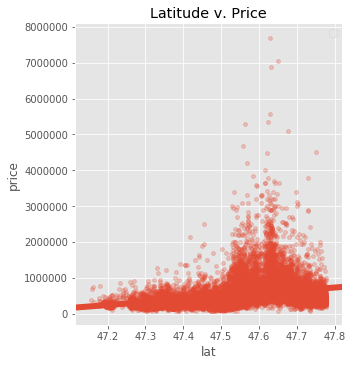

In [96]:
sns.lmplot(x='lat',y='price', data=df,fit_reg=True, scatter_kws={"s": 15,"alpha":.25}, line_kws={"lw":6,"alpha":1}) 
plt.title('Latitude v. Price')
plt.legend()

**Here is a scatterplot of latitude price. It is easy to see the relationship, and how all the pricey houses lie in the north side of King county.
My conclusion is that the northern side of King county has higher sales prices on houses than the southern side, but values go up in both while moving towards the center.**

### QUESTION 2

#### How does being a waterfront property effect the sales price of the house?

First, I split the data in two dataframes by waterfront, and then get the ratio of the mean

In [97]:
dfwf=df.loc[(df['waterfront']==1)]
dfnwf=df.loc[(df['waterfront']==0)]
print(dfwf['price'].mean())
print(dfnwf['price'].mean())
print(dfwf['price'].mean()/dfnwf['price'].mean())

1717214.7260273972
532286.2219943126
3.226111545013362


The average price of house on the water is over 3 times higher than non water front homes. This is a huge difference, definitely worth investigating.

In [98]:
dfwf['price'].quantile(.1)

534000.0

Over 90% of the houses on the waterfront have higher prices then the meanof the non water front houses.

In [99]:
df['price'].corr(df['waterfront'])

0.2643062804831158

In [100]:
m = smf.ols('price ~ waterfront',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1622.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:17:24   Log-Likelihood:            -3.0661e+05
No. Observations:               21597   AIC:                         6.132e+05
Df Residuals:                   21595   BIC:                         6.132e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.323e+05   2419.148    220.030      0.0

#### Conclusion

**So it seems like waterfront houses are on average much pricier, but waterfront status in not a great indicator of housing price. Now I want to make a plot of the prices that shows how the waterfront variable affects the value, so I plot the scatter of latitude vs price, but isolate the waterfront values in green. **

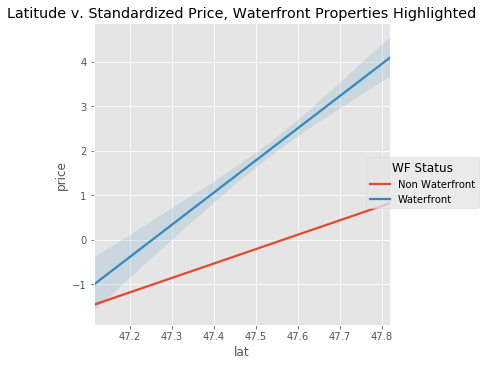

In [101]:
g= sns.lmplot(x="lat", y="price", hue="waterfront", data=df3, fit_reg=True,legend_out = True, scatter=False)
plt.title('Latitude v. Standardized Price, Waterfront Properties Highlighted')
new_title = 'WF Status'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Non Waterfront', 'Waterfront']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


### QUESTION 3

#### Does renovating a house have an effect on house prices? 

Here, I make a new category to represent the time it has been since the last renovation of the house. Then, I check out some statistics and correlations.

In [102]:
df['age']= 2018- df['yr_renovated']
df.head()
df['price'].corr(df['age'])

-0.09754081728139541

In [103]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,['WF']_0.0,['WF']_1.0,age
price,1.000000,0.308787,0.525906,0.611839,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,...,0.321108,0.053953,0.097541,0.306692,0.022036,0.585241,0.082845,-0.264306,0.264306,-0.097541
bedrooms,0.308787,1.000000,0.514508,0.621820,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,...,0.297229,0.155670,0.164392,-0.009951,0.132054,0.393406,0.030690,0.002127,-0.002127,-0.164392
bathrooms,0.525906,0.514508,1.000000,0.762135,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,...,0.278485,0.507173,0.532389,0.024280,0.224903,0.569884,0.088303,-0.063629,0.063629,-0.532389
sqft_living,0.611839,0.621820,0.762135,1.000000,0.150102,0.367564,0.078900,0.244804,-0.049620,0.743038,...,0.417212,0.349689,0.370361,0.038820,0.257196,0.737215,0.162890,-0.078900,0.078900,-0.370361
sqft_lot,0.089876,0.032471,0.088373,0.150102,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,...,0.015031,0.052946,0.051870,-0.085514,0.230227,0.144763,0.718204,-0.021459,0.021459,-0.051870
floors,0.256804,0.177944,0.502582,0.367564,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,...,-0.241866,0.489193,0.500721,0.049239,0.125943,0.280102,-0.010722,-0.020797,0.020797,-0.500721
waterfront,0.264306,-0.002127,0.063629,0.078900,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,...,0.083050,-0.024487,-0.006891,-0.012157,-0.037628,0.083823,0.030658,-1.000000,1.000000,0.006891
view,0.393497,0.078354,0.186016,0.244804,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,...,0.270629,-0.054452,-0.026631,0.006321,-0.077702,0.278928,0.073083,-0.380543,0.380543,0.026631
condition,0.036056,0.026496,-0.126479,-0.049620,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,...,0.168482,-0.361592,-0.390264,-0.015102,-0.105877,-0.093072,-0.003126,-0.016648,0.016648,0.390264
grade,0.667951,0.356563,0.665838,0.743038,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,...,0.165843,0.447865,0.459334,0.113575,0.200341,0.713867,0.120981,-0.082818,0.082818,-0.459334


So the years since renovation does not seem to have a strong correlation with price.

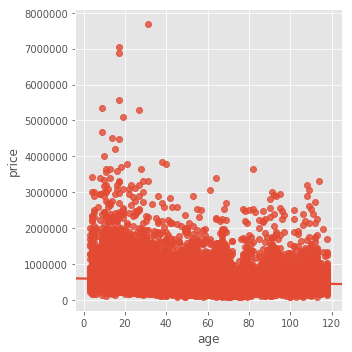

In [104]:
sns.lmplot(x="age", y="price",  data=df, fit_reg=True,)

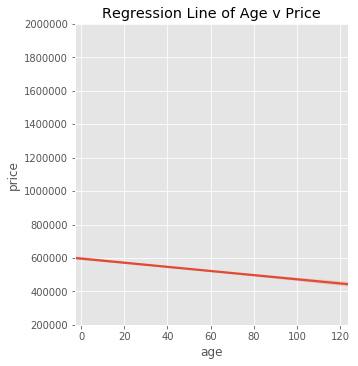

In [105]:
xx=sns.lmplot(x="age", y="price",  data=df, scatter=False,fit_reg=True)
xx.set(ylim=(200000, 2000000))
plt.title("Regression Line of Age v Price")
plt.show()

In [106]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

#### Conclusion

** The age since rennovation is slightly negatively correlated with price, and a lot of the pricey houses have been renovated recently, but the age variable is not a good preidctor of the housing price. If you want to increase housing price through rennovation, adding features such as adding living space, or bedrooms and bathrooms, is the best way to increase value**

### This concludes our exploration of the King county hosuing prices and the OSEMN process used to extract information.